In [1]:
from data_generating_process import fx_white_noise, fx_red_noise

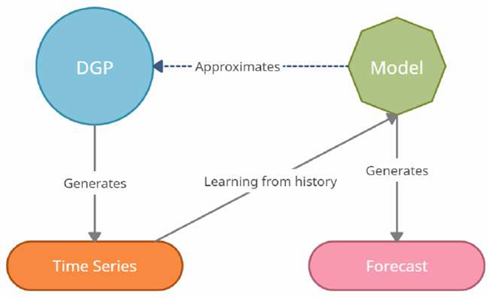

In [2]:
fx_white_noise()

## **Red Noise**:


$x_{j+1}= r * x_{j} + (1 - r^{2})^{0.5} * white$

In [3]:
fx_red_noise()

git clone https://github.com/TimeSynth/TimeSynth.git
cd TimeSynth
python setup.py install

In [4]:
!git clone https://github.com/TimeSynth/TimeSynth.git


fatal: destination path 'TimeSynth' already exists and is not an empty directory.


In [5]:
!cd TimeSynth

In [6]:
!python setup.py install

python: can't open file 'c:\\Users\\Admin\\Desktop\\forecasting\\setup.py': [Errno 2] No such file or directory


In [7]:
import timesynth as ts
from data_generating_process import generate_timeseries
from data_generating_process import fx_plot_time_serie

In [8]:
#PseufiPeridic signal with 
# Amplitude = 1
# Frecuency = 0.25
signal_1 = ts.signals.Sinusoidal(amplitude=1.5, frequency=0.25)
samples_1, regular_time_samples, signals_1, errors_1 = generate_timeseries(signal=signal_1)
signal_2 = ts.signals.Sinusoidal(amplitude=1, frequency=0.5)
samples_2, regular_time_samples, signals_2, errors_2 = generate_timeseries(signal=signal_1)


In [9]:
fx_plot_time_serie(regular_time_samples, samples_1, "Sinusoidal Waves")

In [10]:
fx_plot_time_serie(regular_time_samples, samples_2, "Sinusoidal Waves")

In [11]:
#PseudePeriodic signal
signal = ts.signals.PseudoPeriodic(amplitude=1, frequency=0.25)
samples, regular_time_samples, signals, errors = generate_timeseries(signal=signal)
fx_plot_time_serie(regular_time_samples, samples, "Pseudo Periodic")

In [34]:
# Autoregressive signal with parameters 1.5 and -0.75
# y(t) = 1.5*y(t-1) - 0.75*y(t-2) + noise
import numpy as np

w = np.array([1.5, -0.75])
n_samples = 200
noise_std = 1.0
y = np.zeros(n_samples)
noise = np.random.normal(scale=noise_std, size=n_samples)
time = np.arange(n_samples)

for t in range(2, n_samples):
    y[t] = w[0] * y[t-1] + w[1] * y[t-2] + noise[t]


fx_plot_time_serie(time, y, "Autoregressive signal with parameters 1.5 and -0.75")


In [ ]:
#pseudo-periodic signal with white noise and combine it with an AR signal,

In [45]:
import timesynth as ts
# Generating Pseudo Periodic Signal
pseudo_samples, regular_time_samples, _, _ = generate_timeseries(signal=ts.signals.PseudoPeriodic(amplitude=1, frequency=0.25), noise=ts.noise.GaussianNoise(std=0.3))
# Generating an Autoregressive Signal
pseudo_samples.shape

(100,)

In [46]:
import numpy as np

w = np.array([1.5, -0.75])
n_samples = 100
noise_std = 1.0
y = np.zeros(n_samples)
noise = np.random.normal(scale=noise_std, size=n_samples)
time = np.arange(n_samples)

for t in range(2, n_samples):
    y[t] = w[0] * y[t-1] + w[1] * y[t-2] + noise[t]

In [47]:
time_serie = pseudo_samples*2 + y
fx_plot_time_serie(
    regular_time_samples, time_serie, "Pseudo Periodic with AutoRegression and White Noise"
)

## Stationary and non-stationary time series

### 📊 **Stationarity in Time Series**

A time series is called **stationary** when its **probability distribution** remains **consistent** across all points in time. In simpler terms:

- If you select different **time windows**, the **data distribution** across all those windows should be the **same**.

This consistency is key in many time series analysis techniques, as it ensures that the underlying process generating the data does not change over time. 📈✨


A standard Gaussian distribution is defined by two parameters—the mean and the standard deviation. So, there are two ways the stationarity assumption can be broken, as outlined here: 

* Change in mean over time 
* Change in variance over time 
Let's look at these assumptions in detail and understand them better.

In [54]:
 #Change in mean over time
signal = ts.signals.Sinusoidal(amplitude=1, frequency=0.25)
noise = ts.noise.GaussianNoise(std=0.3)

sinusoidal_samples, regular_time_samples, _, _ = generate_timeseries(signal=signal)
# Regular_time_samples is a linear 
# increasing time axis and can 
# be used as a trend
trend = regular_time_samples*0.4
#combining the signals and trend
time_serie = sinusoidal_samples + trend
fx_plot_time_serie(regular_time_samples, time_serie, "Sinusoidal with Trend and White Noise")

In [62]:
 #Change in mean over time
import timesynth as ts
signal = ts.signals.PseudoPeriodic(amplitude=1, frequency=1)
noise = ts.noise.GaussianNoise(std=0.7)

periodic_samples, regular_time_samples, _, _ = generate_timeseries(signal=signal)
# Regular_time_samples is a linear 
# increasing time axis and can 
# be used as a trend
trend = regular_time_samples*0.4
#combining the signals and trend
time_serie = periodic_samples + trend
fx_plot_time_serie(regular_time_samples, time_serie, "Pseudo Periodic with Trend and White Noise")